# IMPORT GLOBALES

In [1]:
import pandas as pd
import numpy as np
import  requests
import io
import matplotlib.pyplot as plt

# VARIABLES GLOBALES

In [2]:
API_KEY="knB7BNTx60qIkkY21f3ggiqzZhFJruKA27aPjYGO"

#LECTURA DE ARCHIVOS

In [3]:
def get_api_df(dataset):
  url = f"https://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/{dataset}/data.csv/?auth_key={API_KEY}"

  return pd.read_csv(url, encoding="utf-8")

#### Número total de accesos al servicio de Internet fijo por banda ancha y banda angosta (trimestral)

In [4]:
DATASET="INGRE-TRIME-POR-LA-PREST"
df_inicial= get_api_df(DATASET)
df_inicial.head(10)

,Año,Trimestre,Ingresos (miles de $),Periodo
0,2013,1,$ 13.135.235,Ene-Mar 2013
1,2013,2,$ 13.970.806,Abr-Jun 2013
2,2013,3,$ 15.235.659,Jul-Sept 2013
3,2013,4,$ 16.218.846,Oct-Dic 2013
4,2014,1,$ 15.938.353,Ene-Mar 2013
5,2014,2,$ 17.680.972,Abr-Jun 2014
6,2014,3,$ 18.976.053,Jul-Sept 2014
7,2014,4,$ 20.012.332,Oct-Dic 2014
8,2015,1,$ 19.337.342,Ene-Mar 2015
9,2015,2,$ 19.945.453,Abr-Jun 2015


In [5]:
df = df_inicial.copy()
df.rename(columns = {'Ingresos (miles de $)':'Ingresos'}, inplace = True)

def str_to_number(str_value):
  return str(str_value).replace("$","").replace(".","").replace(",",".").strip()

df["Ingresos"] = df["Ingresos"].apply(str_to_number)
df["Ingresos"] = pd.to_numeric(df["Ingresos"])

df

,Año,Trimestre,Ingresos,Periodo
0,2013,1,13135235,Ene-Mar 2013
1,2013,2,13970806,Abr-Jun 2013
2,2013,3,15235659,Jul-Sept 2013
3,2013,4,16218846,Oct-Dic 2013
4,2014,1,15938353,Ene-Mar 2013
5,2014,2,17680972,Abr-Jun 2014
6,2014,3,18976053,Jul-Sept 2014
7,2014,4,20012332,Oct-Dic 2014
8,2015,1,19337342,Ene-Mar 2015
9,2015,2,19945453,Abr-Jun 2015


# ANALISIS

## ANALISIS GENERAL

In [6]:
df.head()

,Año,Trimestre,Ingresos,Periodo
0,2013,1,13135235,Ene-Mar 2013
1,2013,2,13970806,Abr-Jun 2013
2,2013,3,15235659,Jul-Sept 2013
3,2013,4,16218846,Oct-Dic 2013
4,2014,1,15938353,Ene-Mar 2013


In [7]:
df.columns

Index(['Año', 'Trimestre', 'Ingresos', 'Periodo'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Año        40 non-null     int64 
 1   Trimestre  40 non-null     int64 
 2   Ingresos   40 non-null     int64 
 3   Periodo    40 non-null     object
dtypes: int64(3), object(1)
memory usage: 1.4+ KB


In [9]:
df.describe()

,Año,Trimestre,Ingresos
count,40.000000,40.000000,4.000000e+01
mean,2017.500000,2.500000,5.705780e+07
std,2.908872,1.132277,4.821781e+07
min,2013.000000,1.000000,1.313524e+07
25%,2015.000000,1.750000,2.134201e+07
50%,2017.500000,2.500000,3.842199e+07
75%,2020.000000,3.250000,7.506290e+07
max,2022.000000,4.000000,2.047966e+08


## TRATAMIENTO DE DATOS NULOS

In [10]:
df.isnull().sum()

Año          0
Trimestre    0
Ingresos     0
Periodo      0
dtype: int64

In [11]:
df.drop("Periodo",axis=1)

,Año,Trimestre,Ingresos
0,2013,1,13135235
1,2013,2,13970806
2,2013,3,15235659
3,2013,4,16218846
4,2014,1,15938353
5,2014,2,17680972
6,2014,3,18976053
7,2014,4,20012332
8,2015,1,19337342
9,2015,2,19945453


# EXPORTAR DATOS

In [15]:
df.to_csv("data/dinero-trimestral.csv", index= False)

## FORMATEO DE DATOS

## GRAFICOS

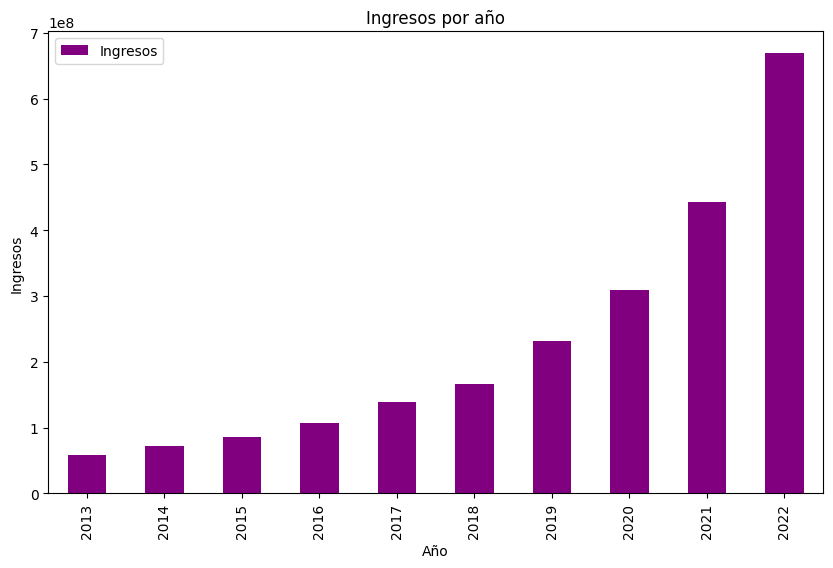

In [14]:
selected_columns = df[['Año', 'Ingresos']]
grouped = selected_columns.groupby(['Año']).sum()

# Gráfico de barras apiladas
grouped.plot(kind='bar', stacked=True, figsize=(10, 6),color=["purple","lightblue","red","black"])
plt.title('Ingresos por año')
plt.xlabel('Año')
plt.ylabel('Ingresos')
#plt.legend(title='Servicios de Internet')
plt.show()